In [42]:
# Imports
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Inline Plots
%matplotlib inline

In [22]:
# Data Read-In
global_temperature = pd.read_csv('./data/global_annual_mean_temp.csv')

In [23]:
# Data Details
global_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          143 non-null    int64  
 1   No_Smoothing  143 non-null    float64
 2   Lowess(5)     143 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.5 KB


In [24]:
# Drop unneeded column: Lowess(5)
global_temperature = global_temperature.drop(columns=['Lowess(5)'])

In [25]:
# Rename columns
global_temperature.columns = ['Year', 'Temperature Change']

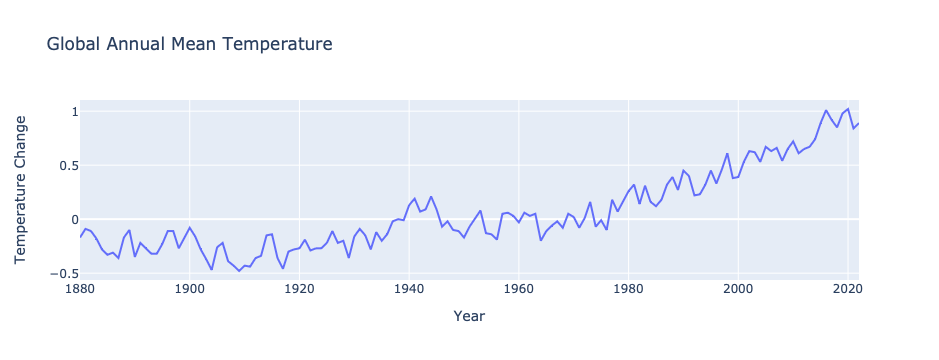

In [28]:
# Visualize the dataframe
plot1 = px.line(global_temperature, x='Year', y='Temperature Change', title='Global Annual Mean Temperature')
plot1.show()

# LINEAR REGRESSION MODEL
---

In [29]:
# Reformat data of the independent variable X as a single-column array
X = global_temperature['Year'].values.reshape(-1, 1)

In [30]:
# Display sample data
X[:5]

array([[1880],
       [1881],
       [1882],
       [1883],
       [1884]])

In [31]:
# The shape of X is 143 samples, with a single feature (column)
X.shape

(143, 1)

In [32]:
# Create an array for the dependent variable y
y = global_temperature['Temperature Change']

In [33]:
# Create a model with scikit-learn
model = LinearRegression()

In [34]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [35]:
# Make predictions using the X set
predicted_y_values = model.predict(X)

In [36]:
# Create a copy of the original data
global_temperature_predicted = global_temperature.copy()

In [37]:
# Add a column with the predicted temperature values
global_temperature_predicted['Predicted Temperature'] = predicted_y_values

In [38]:
# Display head of dataframe
global_temperature_predicted.head()

,Year,Temperature Change,Predicted Temperature
0,1880,-0.17,-0.491801
1,1881,-0.09,-0.484032
2,1882,-0.11,-0.476263
3,1883,-0.18,-0.468494
4,1884,-0.28,-0.460725


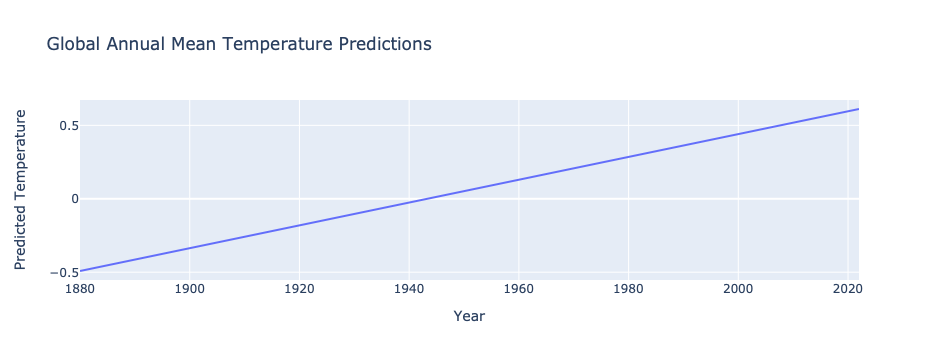

In [39]:
# Visualize the dataframe
plot2 = px.line(global_temperature_predicted, x='Year', y='Predicted Temperature', title='Global Annual Mean Temperature Predictions')
plot2.show()

In [40]:
# Compute the metrics for the linear regression model
score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.7649323708335901.
The r2 is 0.7649323708335901.
The mean squared error is 0.031605078970079456.
The root mean squared error is 0.17777817349179695.
The standard deviation is 0.36667561268663185.


# LOGISTIC REGRESSION MODEL
---

In [44]:
# The target column should be the 'Temperature Change' column.
target = global_temperature['Temperature Change']